In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


from google.colab import files     #colab 돌릴때
uploaded = files.upload()          #colab 돌릴때

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [2]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [4]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [8]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [9]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


In [11]:
wine[wine.quality ==3].head()# 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [12]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [13]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [14]:
white_quality = wine.loc[wine.type==1, 'quality']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


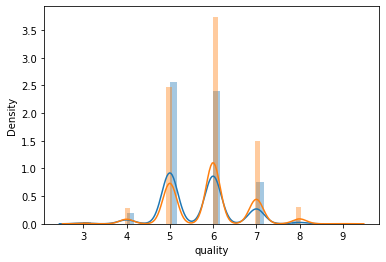

In [15]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

In [16]:
wine["new_1_quality"] = wine.quality

In [17]:
wine["new_2_quality"] = wine.quality

In [18]:
wine.loc[wine.new_1_quality ==9, 'new_1_quality'] = 8

In [19]:
wine.loc[wine.new_2_quality ==9, 'new_2_quality'] = 8
wine.loc[wine.new_2_quality ==3, 'new_2_quality'] = 4

In [20]:
wine
wine.new_1_quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     198
3      30
Name: new_1_quality, dtype: int64

In [21]:
wine
wine.new_2_quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     246
8     198
Name: new_2_quality, dtype: int64

In [22]:
red_1_quality = wine.loc[wine.type == 0, 'new_1_quality']
red_2_quality = wine.loc[wine.type == 0, 'new_2_quality']

In [23]:
white_1_quality = wine.loc[wine.type==1, 'new_1_quality']
white_2_quality = wine.loc[wine.type==1, 'new_2_quality']


### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [26]:
tstat_1, pvalue_1, df_1 = sm.stats.ttest_ind(red_1_quality, white_1_quality)

In [27]:
tstat_2, pvalue_2, df_2 = sm.stats.ttest_ind(red_2_quality, white_2_quality)

In [28]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


In [29]:
print("T값은 %.5f, p-value는 %.8f"%(tstat_1, pvalue_1))

T값은 -9.67078, p-value는 0.00000000


In [30]:
print("T값은 %.5f, p-value는 %.8f"%(tstat_2, pvalue_2))

T값은 -9.72269, p-value는 0.00000000


### 상관관계분석

In [31]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_1_quality,new_2_quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740,-0.077091,-0.075557
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036,-0.266198,-0.264246
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397,0.085354,0.085193
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821,-0.036835,-0.037710
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678,-0.200489,-0.200158
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644,0.055471,0.058905
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357,-0.041502,-0.041502
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645,-0.305735,-0.308269
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129,0.019067,0.020652
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218,0.038978,0.038639


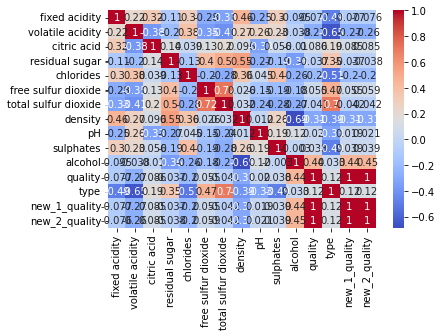

In [32]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [33]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [34]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
new_2_quality           0.996562
new_1_quality           0.999498
quality                 1.000000
dtype: float64

In [35]:
wine.corrwith(wine.new_1_quality).sort_values()

density                -0.305735
volatile acidity       -0.266198
chlorides              -0.200489
fixed acidity          -0.077091
total sulfur dioxide   -0.041502
residual sugar         -0.036835
pH                      0.019067
sulphates               0.038978
free sulfur dioxide     0.055471
citric acid             0.085354
type                    0.119143
alcohol                 0.444275
new_2_quality           0.997028
quality                 0.999498
new_1_quality           1.000000
dtype: float64

In [36]:
wine.corrwith(wine.new_2_quality).sort_values()

density                -0.308269
volatile acidity       -0.264246
chlorides              -0.200158
fixed acidity          -0.075557
total sulfur dioxide   -0.041502
residual sugar         -0.037710
pH                      0.020652
sulphates               0.038639
free sulfur dioxide     0.058905
citric acid             0.085193
type                    0.119773
alcohol                 0.449439
quality                 0.996562
new_1_quality           0.997028
new_2_quality           1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [37]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [38]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [39]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 15)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_1_quality,new_2_quality
424,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5,0,5,5
613,8.2,0.39,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5,0,5,5
1123,10.7,0.40,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,6,0,6,6
1481,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5,0,5,5
996,5.6,0.66,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7,0,7,7


In [40]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 15)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_1_quality,new_2_quality
5872,5.7,0.220,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,1,6,6
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,1,6,6
2746,8.9,0.340,0.32,1.30,0.041,12.0,188.0,0.99530,3.17,0.49,9.5,5,1,5,5
5604,6.8,0.140,0.35,1.50,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6,1,6,6
4031,6.4,0.270,0.17,8.40,0.044,60.0,198.0,0.99578,3.21,0.47,9.4,5,1,5,5


In [41]:
wine_sample = pd.concat([red_sample, white_sample])

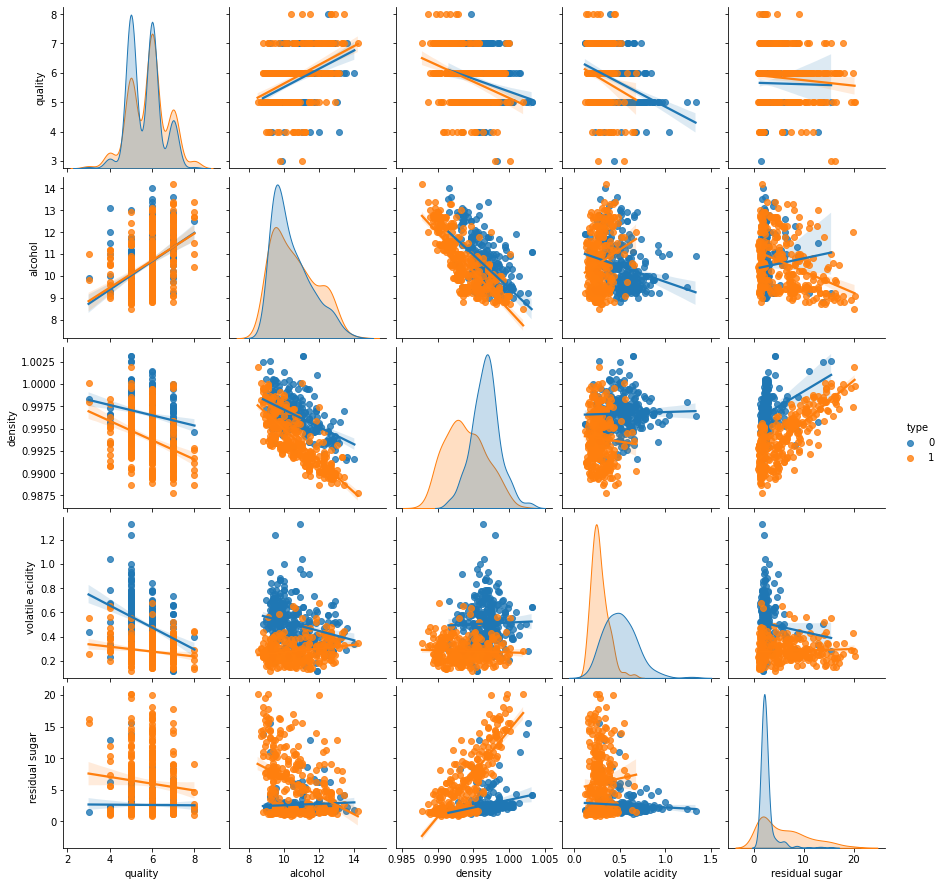

In [42]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

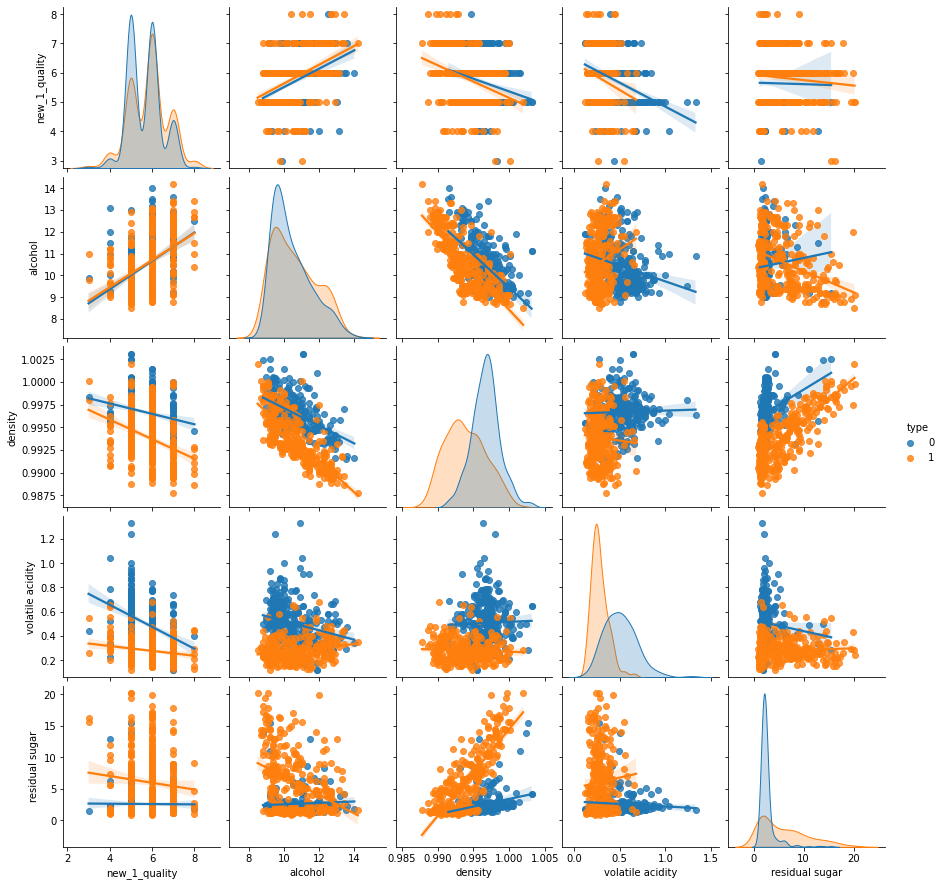

In [43]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['new_1_quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

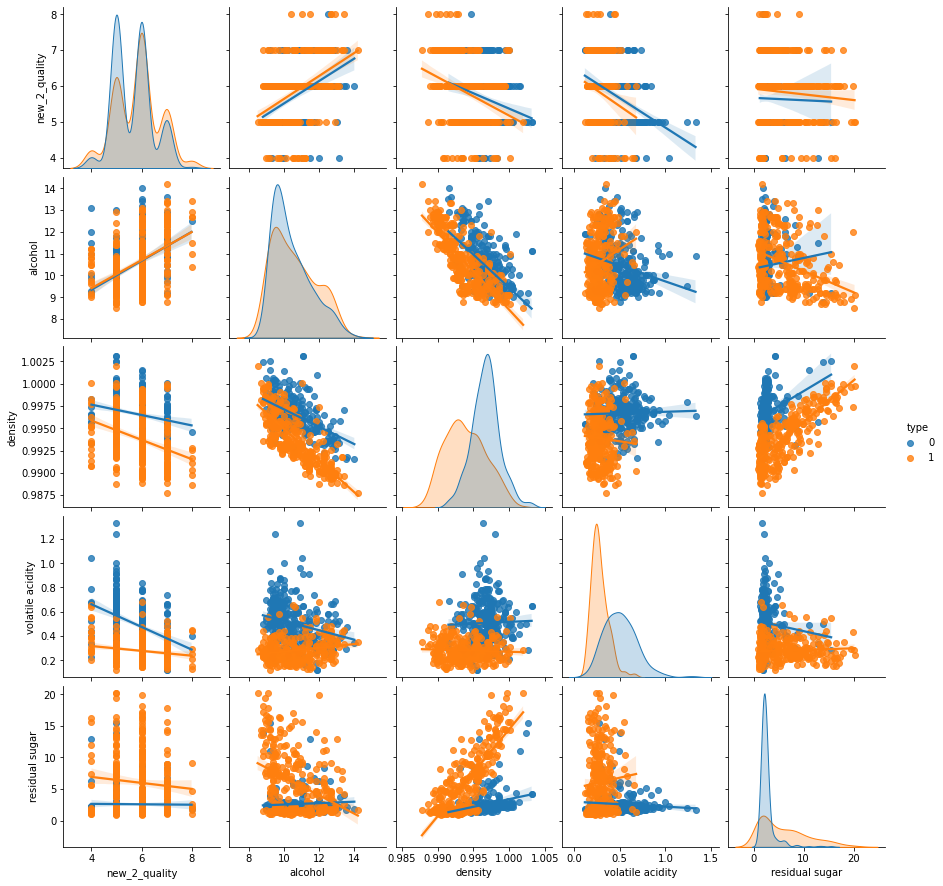

In [44]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['new_2_quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [45]:
wine.columns = wine.columns.str.replace(' ','_')

In [46]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'new_1_quality',
       'new_2_quality'],
      dtype='object')

In [47]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [48]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [49]:
# features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [50]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [51]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [52]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [53]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [54]:
# features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [55]:
# features_Z = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates', 'citric_acid']

In [56]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [57]:
y = wine.quality
X = wine[wine.columns.difference(['new_1_quality', 'type'])]
X_1_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_1_standard = pd.concat([X_1_standard, wine.new_1_quality, wine.type], axis=1)

In [58]:
y = wine.quality
X = wine[wine.columns.difference(['new_2_quality', 'type'])]
X_2_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_2_standard = pd.concat([X_2_standard, wine.new_2_quality, wine.type], axis=1)

In [59]:
X = wine_standard[features]

In [60]:
X = wine_1_standard[features]

In [61]:
X = wine_2_standard[features]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [62]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)


In [64]:
X_1_train, X_1_test, y_1_train, y_test = train_test_split(X, wine.new_1_quality, train_size=0.8, random_state=31)
# test 값은 앞의 기본 퀄리티 값을 사용함

In [65]:
X_2_train, X_2_test, y_2_train, y_test = train_test_split(X, wine.new_2_quality, train_size=0.8, random_state=31)
# test 값은 앞의 기본 퀄리티 값을 사용함

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [67]:
print(X_1_train.shape)
print(X_test.shape)
print(y_1_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [68]:
print(X_2_train.shape)
print(X_test.shape)
print(y_2_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [69]:
# 모델정의


In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [72]:
model_1 = LinearRegression()

In [73]:
model_2 = LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
model_1.fit(X_1_train, y_1_train)

LinearRegression()

In [76]:
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [77]:
prediction = model.predict(X_test)

In [78]:
prediction_1 = model_1.predict(X_test)

In [79]:
prediction_2 = model_2.predict(X_test)

In [80]:
prediction

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [81]:
prediction_1

array([5.61127283, 5.62584937, 6.17209277, ..., 5.29586503, 6.04999882,
       5.41086071])

In [82]:
prediction_2

array([5.60496324, 5.62985247, 6.17990426, ..., 5.3095635 , 6.05827905,
       5.41602511])

### 모델평가

In [83]:
from sklearn import metrics

In [84]:
metrics.mean_absolute_error(y_test, prediction)

0.5503884966190934

In [85]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.4790703572921036

In [86]:
metrics.mean_absolute_error(y_test, prediction_1)

0.5503808777475875

In [87]:
metrics.mean_squared_error(y_test, prediction_1)                 #  오류율이 낮아야 좋은 모델    

0.47901724541455853

In [88]:
metrics.mean_absolute_error(y_test, prediction_2)

0.5508580410561396

In [89]:
metrics.mean_squared_error(y_test, prediction_2)                 #  오류율이 낮아야 좋은 모델    

0.47897287133391814

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [91]:
test_model = RandomForestRegressor(n_estimators = 500, 
                                  max_depth = 30, 
                                  max_features =0.3,
                                  random_state=31,
                                  n_jobs=-1)

In [92]:
cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.39325803, -0.40362721, -0.37588968, -0.41184629, -0.35036041,
       -0.28564124, -0.33642727, -0.40951966, -0.41986289, -0.40165777])

In [93]:
test_1_model = RandomForestRegressor(n_estimators = 500, 
                                  max_depth = 30, 
                                  max_features =0.3,
                                  random_state=31,
                                  n_jobs=-1)

In [94]:
cross_val_score(test_1_model, X_1_train, y_1_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.39522954, -0.39403524, -0.37632724, -0.39967066, -0.34605929,
       -0.28631411, -0.33818458, -0.40610222, -0.40278268, -0.39510441])

In [95]:
test_2_model = RandomForestRegressor(n_estimators = 500, 
                                  max_depth = 30, 
                                  max_features =0.3,
                                  random_state=31,
                                  n_jobs=-1)

In [96]:
cross_val_score(test_2_model, X_2_train, y_2_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.37464495, -0.37242032, -0.35383812, -0.37683523, -0.34553373,
       -0.27551234, -0.32318374, -0.3779229 , -0.39344504, -0.36701454])

# 하이퍼 파라메터 시작...


In [98]:
from tqdm import tqdm

hyper_result =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(50)):
    a = np.random.randint(40,70)
    b = np.random.uniform(0.1,0.9)
    model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()

    hyper_result.append({'점수' : score,
                         'n_estimators' : 300,
                         'MAX_depth': a,
                         'MAX_features': b,
                         'cv' : 5})

    print("현재 스코어는 {0:.5f}".format(score))


  2%|▏         | 1/50 [00:07<06:01,  7.37s/it]

현재 스코어는 -0.39249


  4%|▍         | 2/50 [00:15<06:03,  7.58s/it]

현재 스코어는 -0.39404


  6%|▌         | 3/50 [00:22<06:00,  7.67s/it]

현재 스코어는 -0.39404


  8%|▊         | 4/50 [00:28<05:08,  6.70s/it]

현재 스코어는 -0.39352


 10%|█         | 5/50 [00:33<04:38,  6.18s/it]

현재 스코어는 -0.39352


 12%|█▏        | 6/50 [00:40<04:43,  6.44s/it]

현재 스코어는 -0.39249


 14%|█▍        | 7/50 [00:50<05:33,  7.75s/it]

현재 스코어는 -0.39931


 16%|█▌        | 8/50 [00:55<04:52,  6.95s/it]

현재 스코어는 -0.39352


 18%|█▊        | 9/50 [01:02<04:45,  6.96s/it]

현재 스코어는 -0.39249


 20%|██        | 10/50 [01:07<04:08,  6.21s/it]

현재 스코어는 -0.40000


 22%|██▏       | 11/50 [01:12<03:42,  5.70s/it]

현재 스코어는 -0.40000


 24%|██▍       | 12/50 [01:19<04:01,  6.36s/it]

현재 스코어는 -0.39404


 26%|██▌       | 13/50 [01:24<03:35,  5.81s/it]

현재 스코어는 -0.40000


 28%|██▊       | 14/50 [01:32<03:55,  6.54s/it]

현재 스코어는 -0.39404


 30%|███       | 15/50 [01:44<04:43,  8.11s/it]

현재 스코어는 -0.39931


 32%|███▏      | 16/50 [01:55<05:09,  9.11s/it]

현재 스코어는 -0.39713


 34%|███▍      | 17/50 [02:00<04:19,  7.88s/it]

현재 스코어는 -0.40000


 36%|███▌      | 18/50 [02:10<04:26,  8.34s/it]

현재 스코어는 -0.39570


 38%|███▊      | 19/50 [02:15<03:53,  7.54s/it]

현재 스코어는 -0.39352


 40%|████      | 20/50 [02:20<03:21,  6.71s/it]

현재 스코어는 -0.40000


 42%|████▏     | 21/50 [02:31<03:49,  7.91s/it]

현재 스코어는 -0.39931


 44%|████▍     | 22/50 [02:36<03:13,  6.93s/it]

현재 스코어는 -0.40000


 46%|████▌     | 23/50 [02:45<03:29,  7.78s/it]

현재 스코어는 -0.39713


 48%|████▊     | 24/50 [02:51<03:05,  7.12s/it]

현재 스코어는 -0.39352


 50%|█████     | 25/50 [03:02<03:26,  8.24s/it]

현재 스코어는 -0.39931


 52%|█████▏    | 26/50 [03:11<03:22,  8.44s/it]

현재 스코어는 -0.39570


 54%|█████▍    | 27/50 [03:15<02:47,  7.30s/it]

현재 스코어는 -0.40000


 56%|█████▌    | 28/50 [03:23<02:45,  7.50s/it]

현재 스코어는 -0.39404


 58%|█████▊    | 29/50 [03:33<02:51,  8.19s/it]

현재 스코어는 -0.39713


 60%|██████    | 30/50 [03:38<02:26,  7.34s/it]

현재 스코어는 -0.39352


 62%|██████▏   | 31/50 [03:46<02:18,  7.30s/it]

현재 스코어는 -0.39249


 64%|██████▍   | 32/50 [03:51<02:01,  6.77s/it]

현재 스코어는 -0.39352


 66%|██████▌   | 33/50 [04:01<02:10,  7.69s/it]

현재 스코어는 -0.39713


 68%|██████▊   | 34/50 [04:09<02:05,  7.86s/it]

현재 스코어는 -0.39404


 70%|███████   | 35/50 [04:17<01:56,  7.80s/it]

현재 스코어는 -0.39249


 72%|███████▏  | 36/50 [04:26<01:55,  8.29s/it]

현재 스코어는 -0.39570


 74%|███████▍  | 37/50 [04:31<01:34,  7.24s/it]

현재 스코어는 -0.40000


 76%|███████▌  | 38/50 [04:38<01:24,  7.07s/it]

현재 스코어는 -0.39314


 78%|███████▊  | 39/50 [04:49<01:29,  8.17s/it]

현재 스코어는 -0.39931


 80%|████████  | 40/50 [04:58<01:24,  8.43s/it]

현재 스코어는 -0.39570


 82%|████████▏ | 41/50 [05:03<01:08,  7.58s/it]

현재 스코어는 -0.39352


 84%|████████▍ | 42/50 [05:09<00:56,  7.01s/it]

현재 스코어는 -0.39352


 86%|████████▌ | 43/50 [05:20<00:56,  8.12s/it]

현재 스코어는 -0.39931


 88%|████████▊ | 44/50 [05:28<00:48,  8.07s/it]

현재 스코어는 -0.39404


 90%|█████████ | 45/50 [05:36<00:40,  8.08s/it]

현재 스코어는 -0.39404


 92%|█████████▏| 46/50 [05:42<00:30,  7.55s/it]

현재 스코어는 -0.39314


 94%|█████████▍| 47/50 [05:48<00:21,  7.17s/it]

현재 스코어는 -0.39314


 96%|█████████▌| 48/50 [05:57<00:15,  7.69s/it]

현재 스코어는 -0.39570


 98%|█████████▊| 49/50 [06:03<00:07,  7.01s/it]

현재 스코어는 -0.39352


100%|██████████| 50/50 [06:09<00:00,  7.39s/it]

현재 스코어는 -0.39314


In [99]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
0,-0.392494,300,43,0.499351,5
8,-0.392494,300,40,0.450282,5
5,-0.392494,300,50,0.482292,5
34,-0.392494,300,69,0.445521,5
30,-0.392494,300,40,0.479097,5
...,...,...,...,...,...
21,-0.399997,300,63,0.146530,5
19,-0.399997,300,47,0.139206,5
36,-0.399997,300,51,0.189581,5
26,-0.399997,300,55,0.119758,5


In [100]:
from tqdm import tqdm

hyper_result_1 =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(50)):
    a = np.random.randint(40,70)
    b = np.random.uniform(0.1,0.9)
    model_1 = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score_1 = cross_val_score(model_1, X_1_train, y_1_train, scoring= 'neg_mean_squared_error', cv=5).mean()

    hyper_result_1.append({'점수' : score_1,
                         'n_estimators' : 300,
                         'MAX_depth': a,
                         'MAX_features': b,
                         'cv' : 5})

    print("현재 스코어는 {0:.5f}".format(score_1))


  2%|▏         | 1/50 [00:07<05:49,  7.13s/it]

현재 스코어는 -0.38883


  4%|▍         | 2/50 [00:12<04:51,  6.07s/it]

현재 스코어는 -0.38971


  6%|▌         | 3/50 [00:18<04:48,  6.13s/it]

현재 스코어는 -0.38944


  8%|▊         | 4/50 [00:28<05:46,  7.54s/it]

현재 스코어는 -0.39321


 10%|█         | 5/50 [00:32<04:50,  6.45s/it]

현재 스코어는 -0.39614


 12%|█▏        | 6/50 [00:40<05:04,  6.92s/it]

현재 스코어는 -0.39025


 14%|█▍        | 7/50 [00:46<04:35,  6.41s/it]

현재 스코어는 -0.38971


 16%|█▌        | 8/50 [00:50<04:05,  5.85s/it]

현재 스코어는 -0.39614


 18%|█▊        | 9/50 [00:57<04:15,  6.24s/it]

현재 스코어는 -0.38883


 20%|██        | 10/50 [01:08<05:02,  7.57s/it]

현재 스코어는 -0.39572


 22%|██▏       | 11/50 [01:14<04:38,  7.14s/it]

현재 스코어는 -0.38944


 24%|██▍       | 12/50 [01:23<04:51,  7.67s/it]

현재 스코어는 -0.39200


 26%|██▌       | 13/50 [01:29<04:28,  7.25s/it]

현재 스코어는 -0.38944


 28%|██▊       | 14/50 [01:40<05:04,  8.45s/it]

현재 스코어는 -0.39572


 30%|███       | 15/50 [01:47<04:32,  7.78s/it]

현재 스코어는 -0.38944


 32%|███▏      | 16/50 [01:54<04:19,  7.64s/it]

현재 스코어는 -0.38883


 34%|███▍      | 17/50 [02:05<04:41,  8.52s/it]

현재 스코어는 -0.39572


 36%|███▌      | 18/50 [02:13<04:34,  8.59s/it]

현재 스코어는 -0.39200


 38%|███▊      | 19/50 [02:21<04:19,  8.36s/it]

현재 스코어는 -0.39025


 40%|████      | 20/50 [02:27<03:44,  7.49s/it]

현재 스코어는 -0.38971


 42%|████▏     | 21/50 [02:31<03:11,  6.60s/it]

현재 스코어는 -0.39614


 44%|████▍     | 22/50 [02:36<02:47,  5.98s/it]

현재 스코어는 -0.39614


 46%|████▌     | 23/50 [02:40<02:30,  5.56s/it]

현재 스코어는 -0.39614


 48%|████▊     | 24/50 [02:47<02:35,  5.98s/it]

현재 스코어는 -0.38883


 50%|█████     | 25/50 [02:56<02:50,  6.81s/it]

현재 스코어는 -0.39200


 52%|█████▏    | 26/50 [03:01<02:27,  6.15s/it]

현재 스코어는 -0.39614


 54%|█████▍    | 27/50 [03:09<02:39,  6.93s/it]

현재 스코어는 -0.39200


 56%|█████▌    | 28/50 [03:15<02:27,  6.70s/it]

현재 스코어는 -0.38944


 58%|█████▊    | 29/50 [03:20<02:07,  6.09s/it]

현재 스코어는 -0.39614


 60%|██████    | 30/50 [03:30<02:23,  7.17s/it]

현재 스코어는 -0.39321


 62%|██████▏   | 31/50 [03:39<02:25,  7.64s/it]

현재 스코어는 -0.39200


 64%|██████▍   | 32/50 [03:45<02:09,  7.19s/it]

현재 스코어는 -0.38944


 66%|██████▌   | 33/50 [03:54<02:14,  7.92s/it]

현재 스코어는 -0.39321


 68%|██████▊   | 34/50 [04:03<02:10,  8.15s/it]

현재 스코어는 -0.39200


 70%|███████   | 35/50 [04:08<01:49,  7.28s/it]

현재 스코어는 -0.38971


 72%|███████▏  | 36/50 [04:19<01:55,  8.24s/it]

현재 스코어는 -0.39572


 74%|███████▍  | 37/50 [04:27<01:48,  8.36s/it]

현재 스코어는 -0.39200


 76%|███████▌  | 38/50 [04:33<01:31,  7.66s/it]

현재 스코어는 -0.38944


 78%|███████▊  | 39/50 [04:43<01:30,  8.23s/it]

현재 스코어는 -0.39321


 80%|████████  | 40/50 [04:51<01:20,  8.10s/it]

현재 스코어는 -0.39025


 82%|████████▏ | 41/50 [04:55<01:03,  7.03s/it]

현재 스코어는 -0.39614


 84%|████████▍ | 42/50 [05:02<00:56,  7.03s/it]

현재 스코어는 -0.38883


 86%|████████▌ | 43/50 [05:08<00:45,  6.51s/it]

현재 스코어는 -0.38971


 88%|████████▊ | 44/50 [05:17<00:44,  7.44s/it]

현재 스코어는 -0.39321


 90%|█████████ | 45/50 [05:23<00:35,  7.04s/it]

현재 스코어는 -0.38944


 92%|█████████▏| 46/50 [05:31<00:29,  7.28s/it]

현재 스코어는 -0.39025


 94%|█████████▍| 47/50 [05:40<00:23,  7.71s/it]

현재 스코어는 -0.39200


 96%|█████████▌| 48/50 [05:47<00:14,  7.49s/it]

현재 스코어는 -0.38883


 98%|█████████▊| 49/50 [05:53<00:07,  7.08s/it]

현재 스코어는 -0.38944


100%|██████████| 50/50 [06:03<00:00,  7.28s/it]

현재 스코어는 -0.39572


In [101]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result_1).sort_values(by='점수', ascending=False) 

pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
0,-0.388829,300,48,0.488053,5
8,-0.388829,300,49,0.480052,5
47,-0.388829,300,55,0.483930,5
23,-0.388829,300,57,0.419620,5
15,-0.388829,300,47,0.406940,5
...,...,...,...,...,...
21,-0.396141,300,48,0.126629,5
20,-0.396141,300,64,0.164032,5
7,-0.396141,300,63,0.192039,5
4,-0.396141,300,53,0.196559,5


In [102]:
from tqdm import tqdm

hyper_result_2 =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(50)):
    a = np.random.randint(40,70)
    b = np.random.uniform(0.1,0.9)
    model_2 = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score_2 = cross_val_score(model_2, X_2_train, y_2_train, scoring= 'neg_mean_squared_error', cv=5).mean()

    hyper_result_2.append({'점수' : score_2,
                         'n_estimators' : 300,
                         'MAX_depth': a,
                         'MAX_features': b,
                         'cv' : 5})

    print("현재 스코어는 {0:.5f}".format(score_2))


  2%|▏         | 1/50 [00:04<03:42,  4.54s/it]

현재 스코어는 -0.37547


  4%|▍         | 2/50 [00:11<04:46,  5.97s/it]

현재 스코어는 -0.36919


  6%|▌         | 3/50 [00:18<05:02,  6.44s/it]

현재 스코어는 -0.36919


  8%|▊         | 4/50 [00:26<05:19,  6.95s/it]

현재 스코어는 -0.37031


 10%|█         | 5/50 [00:34<05:26,  7.25s/it]

현재 스코어는 -0.37031


 12%|█▏        | 6/50 [00:38<04:40,  6.37s/it]

현재 스코어는 -0.37547


 14%|█▍        | 7/50 [00:45<04:45,  6.63s/it]

현재 스코어는 -0.36919


 16%|█▌        | 8/50 [00:51<04:28,  6.38s/it]

현재 스코어는 -0.37056


 18%|█▊        | 9/50 [01:00<04:54,  7.17s/it]

현재 스코어는 -0.37168


 20%|██        | 10/50 [01:09<05:05,  7.64s/it]

현재 스코어는 -0.37168


 22%|██▏       | 11/50 [01:13<04:22,  6.72s/it]

현재 스코어는 -0.37547


 24%|██▍       | 12/50 [01:19<04:00,  6.32s/it]

현재 스코어는 -0.37056


 26%|██▌       | 13/50 [01:28<04:30,  7.32s/it]

현재 스코어는 -0.37454


 28%|██▊       | 14/50 [01:37<04:39,  7.76s/it]

현재 스코어는 -0.37168


 30%|███       | 15/50 [01:47<04:54,  8.43s/it]

현재 스코어는 -0.37454


 32%|███▏      | 16/50 [01:53<04:15,  7.50s/it]

현재 스코어는 -0.37056


 34%|███▍      | 17/50 [01:57<03:39,  6.64s/it]

현재 스코어는 -0.37547


 36%|███▌      | 18/50 [02:02<03:13,  6.03s/it]

현재 스코어는 -0.37547


 38%|███▊      | 19/50 [02:10<03:23,  6.56s/it]

현재 스코어는 -0.37031


 40%|████      | 20/50 [02:16<03:12,  6.41s/it]

현재 스코어는 -0.36897


 42%|████▏     | 21/50 [02:24<03:24,  7.06s/it]

현재 스코어는 -0.37168


 44%|████▍     | 22/50 [02:35<03:45,  8.04s/it]

현재 스코어는 -0.37528


 46%|████▌     | 23/50 [02:42<03:34,  7.94s/it]

현재 스코어는 -0.37031


 48%|████▊     | 24/50 [02:52<03:38,  8.41s/it]

현재 스코어는 -0.37454


 50%|█████     | 25/50 [03:01<03:38,  8.74s/it]

현재 스코어는 -0.37454


 52%|█████▏    | 26/50 [03:08<03:16,  8.21s/it]

현재 스코어는 -0.36919


 54%|█████▍    | 27/50 [03:13<02:48,  7.31s/it]

현재 스코어는 -0.37056


 56%|█████▌    | 28/50 [03:19<02:28,  6.73s/it]

현재 스코어는 -0.37056


 58%|█████▊    | 29/50 [03:25<02:19,  6.65s/it]

현재 스코어는 -0.36897


 60%|██████    | 30/50 [03:36<02:35,  7.77s/it]

현재 스코어는 -0.37528


 62%|██████▏   | 31/50 [03:41<02:13,  7.02s/it]

현재 스코어는 -0.37056


 64%|██████▍   | 32/50 [03:46<01:53,  6.29s/it]

현재 스코어는 -0.37547


 66%|██████▌   | 33/50 [03:51<01:42,  6.02s/it]

현재 스코어는 -0.37056


 68%|██████▊   | 34/50 [04:00<01:48,  6.79s/it]

현재 스코어는 -0.37168


 70%|███████   | 35/50 [04:05<01:35,  6.34s/it]

현재 스코어는 -0.37056


 72%|███████▏  | 36/50 [04:10<01:24,  6.06s/it]

현재 스코어는 -0.37056


 74%|███████▍  | 37/50 [04:18<01:25,  6.58s/it]

현재 스코어는 -0.37031


 76%|███████▌  | 38/50 [04:24<01:17,  6.44s/it]

현재 스코어는 -0.36897


 78%|███████▊  | 39/50 [04:34<01:20,  7.35s/it]

현재 스코어는 -0.37454


 80%|████████  | 40/50 [04:44<01:22,  8.25s/it]

현재 스코어는 -0.37528


 82%|████████▏ | 41/50 [04:48<01:04,  7.13s/it]

현재 스코어는 -0.37547


 84%|████████▍ | 42/50 [04:56<00:58,  7.32s/it]

현재 스코어는 -0.37031


 86%|████████▌ | 43/50 [05:01<00:45,  6.49s/it]

현재 스코어는 -0.37547


 88%|████████▊ | 44/50 [05:06<00:36,  6.14s/it]

현재 스코어는 -0.37056


 90%|█████████ | 45/50 [05:11<00:28,  5.69s/it]

현재 스코어는 -0.37547


 92%|█████████▏| 46/50 [05:21<00:28,  7.10s/it]

현재 스코어는 -0.37528


 94%|█████████▍| 47/50 [05:26<00:19,  6.56s/it]

현재 스코어는 -0.37056


 96%|█████████▌| 48/50 [05:34<00:13,  6.92s/it]

현재 스코어는 -0.37031


 98%|█████████▊| 49/50 [05:43<00:07,  7.43s/it]

현재 스코어는 -0.37168


100%|██████████| 50/50 [05:51<00:00,  7.02s/it]

현재 스코어는 -0.37031


In [103]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result_2).sort_values(by='점수', ascending=False) 

pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
37,-0.368973,300,50,0.344872,5
28,-0.368973,300,52,0.390752,5
19,-0.368973,300,43,0.379951,5
6,-0.369192,300,63,0.419972,5
25,-0.369192,300,61,0.492802,5
...,...,...,...,...,...
5,-0.375469,300,55,0.172660,5
10,-0.375469,300,49,0.147284,5
17,-0.375469,300,68,0.173021,5
16,-0.375469,300,41,0.156451,5


In [104]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
print(pd.DataFrame(hyper_result_1)['점수'].max())
print(pd.DataFrame(hyper_result_2)['점수'].max())



print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())
print(pd.DataFrame(hyper_result_1)['점수'].mean())
print(pd.DataFrame(hyper_result_2)['점수'].mean())

최소에러율
-0.3924939792988643
-0.38882916863891365
-0.36897322912413444
 
평균에러율
-0.3957066166712627
-0.39194516487457387
-0.37210912044388067


In [105]:
# 최종 모델정의

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [107]:
Finalmodel = RandomForestRegressor()

In [108]:
Finalmodel_1 = RandomForestRegressor()

In [109]:
Finalmodel_2 = RandomForestRegressor()

In [110]:
Finalmodel.fit(X_train, y_train)

RandomForestRegressor()

In [111]:
Finalmodel_1.fit(X_1_train, y_1_train)

RandomForestRegressor()

In [112]:
Finalmodel_2.fit(X_2_train, y_2_train)

RandomForestRegressor()

In [113]:
prediction = Finalmodel.predict(X_test)
prediction_1 = Finalmodel_1.predict(X_test)
prediction_2 = Finalmodel_2.predict(X_test)

In [114]:
prediction

array([5.96, 5.69, 6.84, ..., 5.72, 6.4 , 5.38])

In [115]:
prediction_1

array([5.98, 5.63, 6.85, ..., 5.66, 6.42, 5.6 ])

In [116]:
prediction_2

array([5.97, 5.67, 6.88, ..., 5.74, 6.5 , 5.54])

### 모델평가

In [117]:
from sklearn import metrics

In [118]:
metrics.mean_absolute_error(y_test, prediction)

0.43429999999999996

In [119]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.3468906923076923

In [120]:
metrics.mean_absolute_error(y_test, prediction_1)

0.43176923076923074

In [121]:
metrics.mean_squared_error(y_test, prediction_1)                 #  오류율이 낮아야 좋은 모델    

0.3414433846153846

In [122]:
metrics.mean_absolute_error(y_test, prediction_2)

0.4317615384615384

In [123]:
metrics.mean_squared_error(y_test, prediction_2)                 #  오류율이 낮아야 좋은 모델    

0.3438640769230769

### 상단 개인작업구간

In [124]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [125]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [126]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [127]:

#  증명력을 추가적으로 확인해보아야 함


In [128]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [129]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [130]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [131]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [132]:
# formula_model = ols(formula, data=wine).fit()          #

In [133]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
# formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
# formula_model.summary()

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

In [ ]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [ ]:
formula_20220530_result.summary()              #citric_acid

In [ ]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 
# 추가 분석진행